Proposal:

Breast cancer is one of the major killers in the United States. A major question we want to ask is: Are breast cancer deaths in certain races more prevalent than others? In other words, which race represents the highest numbers of deaths in the United States due to Breast Cancer? Since breast cancer is mainly an issue in females, our dataset will include females only. Our dataset includes number of deaths for different age groups and different races from 1999 to 2016.

Primary observation: White females seem to have the highest death numbers from breast cancer, followed by black or african americans. I have all ages, and both sexes included, which needs to be modified. I also have a long paragraph at the end of my dataset which may cause some inconsistencies in our dataframe.

data source location: https://wonder.cdc.gov/cancer.html

NOTE: I am not able to upload the data as a URL since the dataset is not readily available or displayed on the website. I need to choose my criteria, and download the table. 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import itertools

In [2]:
#read csv and save it in dataframe
df = pd.read_csv("US BREAST CANCER MORTALITY.txt", delimiter='\t')

In [3]:
#number of columns and rows in df
df.shape

(7179, 12)

In [4]:
#Get general information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7179 entries, 0 to 7178
Data columns (total 12 columns):
Notes             54 non-null object
Year              7125 non-null float64
Year Code         7125 non-null float64
Age Group         7125 non-null object
Age Group Code    7125 non-null object
Sex               7125 non-null object
Sex Code          7125 non-null object
Ethnicity         7125 non-null object
Ethnicity Code    7125 non-null object
Race              7125 non-null object
Race Code         7125 non-null object
Deaths            7125 non-null object
dtypes: float64(2), object(10)
memory usage: 673.1+ KB


In [5]:
#get a general idea on how the dataset looks like and look for anomalies 
#top 5 rows
df.head()

,Notes,Year,Year Code,Age Group,Age Group Code,Sex,Sex Code,Ethnicity,Ethnicity Code,Race,Race Code,Deaths
0,NaN,1999.0,1999.0,< 1 year,1,Female,F,Hispanic,2135-2,American Indian or Alaska Native,1002-5,0
1,NaN,1999.0,1999.0,< 1 year,1,Female,F,Hispanic,2135-2,Asian or Pacific Islander,A-PI,0
2,NaN,1999.0,1999.0,< 1 year,1,Female,F,Hispanic,2135-2,Black or African American,2054-5,0
3,NaN,1999.0,1999.0,< 1 year,1,Female,F,Hispanic,2135-2,White,2106-3,0
4,NaN,1999.0,1999.0,< 1 year,1,Female,F,Non-Hispanic,2186-5,American Indian or Alaska Native,1002-5,0


In [6]:
#bottom 5 rows
df.tail()

,Notes,Year,Year Code,Age Group,Age Group Code,Sex,Sex Code,Ethnicity,Ethnicity Code,Race,Race Code,Deaths
7174,death counts have been moved to the Miscellane...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7175,"6. For the 2005 year, the Census Bureau estima...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7176,Texas due to Hurricanes Katrina and Rita. CDC ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7177,"these states, nor are these counts included in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7178,"population. However, the USCS web site does in...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Anomalies: Notes column; Sex includes both males and females; we have columns that we don't need

In [7]:
#Our analysis is focused on females so we will drop all of the male rows

df.drop(df[df['Sex'] == 'Male'].index, inplace=True)

In [8]:
#drop the columns I don't need and get the top 5 rows to make sure changes have been applied

df.drop(['Notes', 'Year Code', 'Sex Code','Ethnicity Code'], axis = 1, inplace= True)
df.head()

,Year,Age Group,Age Group Code,Sex,Ethnicity,Race,Race Code,Deaths
0,1999.0,< 1 year,1,Female,Hispanic,American Indian or Alaska Native,1002-5,0
1,1999.0,< 1 year,1,Female,Hispanic,Asian or Pacific Islander,A-PI,0
2,1999.0,< 1 year,1,Female,Hispanic,Black or African American,2054-5,0
3,1999.0,< 1 year,1,Female,Hispanic,White,2106-3,0
4,1999.0,< 1 year,1,Female,Non-Hispanic,American Indian or Alaska Native,1002-5,0


In [9]:
#reset indexes

df= df.reset_index(drop=True)

In [10]:
#bottom 56 rows- from originally looking at the dataset table we know that we would have a bunch of text at the bottom
#by getting the bottom 56 rows, I am checking how many all null rows I have so I can delete them

df.tail(56)

,Year,Age Group,Age Group Code,Sex,Ethnicity,Race,Race Code,Deaths
3019,2016.0,85+ years,85+,Female,Unknown or Missing,American Indian or Alaska Native,1002-5,0
3020,2016.0,85+ years,85+,Female,Unknown or Missing,Asian or Pacific Islander,A-PI,0
3021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#drop the bottom null rows
df.drop(df.index[3021:3075], inplace= True)

#and get the bottom 5 rows to double check changes have been applied
df.tail()

,Year,Age Group,Age Group Code,Sex,Ethnicity,Race,Race Code,Deaths
3016,2016.0,85+ years,85+,Female,Non-Hispanic,Asian or Pacific Islander,A-PI,106
3017,2016.0,85+ years,85+,Female,Non-Hispanic,Black or African American,2054-5,642
3018,2016.0,85+ years,85+,Female,Non-Hispanic,White,2106-3,5942
3019,2016.0,85+ years,85+,Female,Unknown or Missing,American Indian or Alaska Native,1002-5,0
3020,2016.0,85+ years,85+,Female,Unknown or Missing,Asian or Pacific Islander,A-PI,0


In [12]:
#convert Deaths values from object to integers so I can use them in my analysis 
df['Deaths']= df['Deaths'].astype(int)

In [13]:
#display all the different age groups that we have
df['Age Group Code'].unique()

array(['1', '1-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34',
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80-84', '85+'], dtype=object)

In [14]:
#Teenagers and children less than 19 are too young to have breast cancer; and from looking at the table, they all have a value of 0 deaths
#drop age groups 1-19 years old
df.drop(df[df['Age Group Code'] == '1'].index, inplace=True)
df.drop(df[df['Age Group Code'] == '1-4'].index, inplace=True)
df.drop(df[df['Age Group Code'] == '5-9'].index, inplace=True)
df.drop(df[df['Age Group Code'] == '10-14'].index, inplace=True)
df.drop(df[df['Age Group Code'] == '15-19'].index, inplace=True)

In [15]:
#I would like to get the most recent results, and so I will get a new dataframe that has only the 2016 year rows
df_2016= df[df['Year']== 2016.0]

In [16]:
#Get the number of rows and columns in the new dataframe
df_2016.shape

(106, 8)

In [17]:
#Make sure new dataframe doesn't have any null values 
df_2016.isnull().sum()

Year              0
Age Group         0
Age Group Code    0
Sex               0
Ethnicity         0
Race              0
Race Code         0
Deaths            0
dtype: int64

In [18]:
#get the different races that we have in the dataset
df_2016.Race.unique()

array(['American Indian or Alaska Native', 'Asian or Pacific Islander',
       'Black or African American', 'White'], dtype=object)

In [19]:
#get a table with only white race
df_2016_white= df_2016[df_2016['Race']=="White"]

In [20]:
#get a table with only black or african american race
df_2016_AfricanAmerican= df_2016[df_2016['Race']=="Black or African American"]

In [21]:
#get a table with only asian or pacific islander race
df_2016_Asian= df_2016[df_2016['Race']=="Asian or Pacific Islander"]

In [22]:
#get a table with american indian or alaska native race
df_2016_IndianOrNative= df_2016[df_2016['Race']=="American Indian or Alaska Native"]

In [23]:
#maximum number of deaths from breast cancer in each race in 2016
print('The maximum number of white people that died from breast cancer in 2016 is:', df_2016[df_2016['Race']=="White"]['Deaths'].max())
print('The maximum number of Black or African American people that died from breast cancer in 2016 is:', df_2016[df_2016['Race']=="Black or African American"]['Deaths'].max())
print('The maximum number of Asian or Pacific Islander people that died from breast cancer in 2016 is:', df_2016[df_2016['Race']=="Asian or Pacific Islander"]['Deaths'].max())
print('The maximum number of American Indian or Alaska Native people that died from breast cancer in 2016 is:', df_2016[df_2016['Race']=="American Indian or Alaska Native"]['Deaths'].max())

The maximum number of white people that died from breast cancer in 2016 is: 5942
The maximum number of Black or African American people that died from breast cancer in 2016 is: 775
The maximum number of Asian or Pacific Islander people that died from breast cancer in 2016 is: 173
The maximum number of American Indian or Alaska Native people that died from breast cancer in 2016 is: 30


In [24]:
#total number of deaths- includes all races
Deaths_2016= df_2016['Deaths'].sum()
print('The total number of deaths from breast cancer in females in 2016 is:', Deaths_2016)

#the sum and percentage of deaths for each race in 2016

#sum and percentage of white females deaths
Wdeaths_total_2016= df_2016[df_2016['Race']=="White"]['Deaths'].sum()
percent_whitedeaths_2016= Wdeaths_total_2016/Deaths_2016*100
print('The total number, and percentage of white females that died from breast cancer in 2016 respectively is:', Wdeaths_total_2016,',', round(percent_whitedeaths_2016),'%')

#sum and percentage of Black or African American females deaths
AAdeaths_total_2016= df_2016[df_2016['Race']=="Black or African American"]['Deaths'].sum()
percent_africanamericandeaths_2016= AAdeaths_total_2016/Deaths_2016*100
print('The total number, and percentage of Black or African American females that died from breast cancer in 2016 respectively is:', AAdeaths_total_2016,',', round(percent_africanamericandeaths_2016),'%')

#sum and percentage of Asian or Pacific Islander females deaths
APIdeaths_total_2016= df_2016[df_2016['Race']=="Asian or Pacific Islander"]['Deaths'].sum()
percent_asiandeaths_2016= APIdeaths_total_2016/Deaths_2016*100
print('The total number, and percentage of Asian or Pacific Islander females that died from breast cancer in 2016 respectively is:', APIdeaths_total_2016,',', round(percent_asiandeaths_2016),'%')

#sum and percentage of American Indian or Alaska Native females deaths
INdeaths_total_2016= df_2016[df_2016['Race']=="American Indian or Alaska Native"]['Deaths'].sum()
percent_indianornativedeaths_2016= INdeaths_total_2016/Deaths_2016*100
print('The total number, and percentage of American Indian or Alaska Native females that died from breast cancer in 2016 respectively is:', INdeaths_total_2016,',', round(percent_indianornativedeaths_2016),'%')

The total number of deaths from breast cancer in females in 2016 is: 41252
The total number, and percentage of white females that died from breast cancer in 2016 respectively is: 33671 , 82.0 %
The total number, and percentage of Black or African American females that died from breast cancer in 2016 respectively is: 6251 , 15.0 %
The total number, and percentage of Asian or Pacific Islander females that died from breast cancer in 2016 respectively is: 1165 , 3.0 %
The total number, and percentage of American Indian or Alaska Native females that died from breast cancer in 2016 respectively is: 165 , 0.0 %


Observation: The highest maximum number as well as the highest percentage of deaths was shown in the white race, followed by black african american, Asian or Pacific Islander, then American Indian or Alaska Native.

In [25]:
#get all the values from 1999 in one variable
df_1999= df[df['Year']== 1999.0]

#get the female deaths sum of each race to use in the barplot
Wdeaths_total_1999= df_1999[df_1999['Race']=="White"]['Deaths'].sum()
AAdeaths_total_1999= df_1999[df_1999['Race']=="Black or African American"]['Deaths'].sum()
APIdeaths_total_1999= df_1999[df_1999['Race']=="Asian or Pacific Islander"]['Deaths'].sum()
INdeaths_total_1999= df_1999[df_1999['Race']=="American Indian or Alaska Native"]['Deaths'].sum()

In [26]:
#define my x and y variables for the barplot

x= ['White', 'Black or African American', 'Asian or Pacific Islander', 'American Indian or Alaska Native']
y= [Wdeaths_total_2016, AAdeaths_total_2016, APIdeaths_total_2016, INdeaths_total_2016 ]

x2= ['White2', 'Black or African American2', 'Asian or Pacific Islander2', 'American Indian or Alaska Native2']
y2= [Wdeaths_total_1999, AAdeaths_total_1999, APIdeaths_total_1999, INdeaths_total_1999]

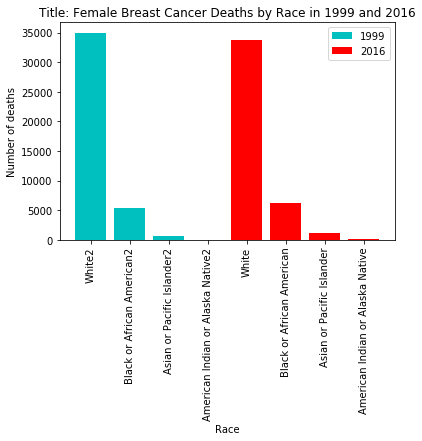

In [27]:
#Plot the Barplot

#bar width
bar_width= 0.3

plt.bar(x2, y2, label= '1999', color= 'c')
plt.bar(x, y, label= '2016', color= 'r')

plt.xticks(rotation=90)
plt.xlabel('Race')
plt.ylabel('Number of deaths')
plt.title('Title: Female Breast Cancer Deaths by Race in 1999 and 2016')
plt.legend()
plt.show()

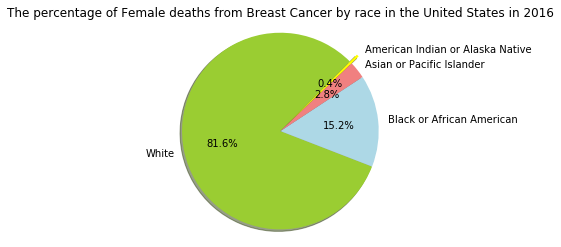

In [28]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = 'White', 'Black or African American', 'Asian or Pacific Islander', 'American Indian or Alaska Native'
sizes = [percent_whitedeaths_2016, percent_africanamericandeaths_2016, percent_asiandeaths_2016, percent_indianornativedeaths_2016]
colors = ['yellowgreen', 'lightblue', 'lightcoral', 'yellow']
explode = (0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors= colors, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('The percentage of Female deaths from Breast Cancer by race in the United States in 2016')

plt.show()

Conclusion:

Based on our analysis, if a female is white, she would be more likely to get breast cancer, followed by black african american women, Asian or Pacific Islander, then American Indian or Alaska Native. However, this would need further investigation as this could be just the population distribution. In 2018, white people made 76.5% of the population, black african american made 13.4%, asian made 5.9%, and American Indian and Alaska Native made 1.3%. Therefore, our result are more than likely reflecting the country population's distribution. 
As a result, we can't conclude that breast cancer death is more probable in a race than another.

Sources:


    https://datatofish.com/reset-index-pandas-dataframe/
    
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
    
    https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/
    
    https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
    
    https://scipy-lectures.org/packages/statistics/index.html
    
    https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int
    
    https://raw.githubusercontent.com/ft-interactive/chart-doctor/master/visual-vocabulary/poster.png
    
    https://thispointer.com/python-pandas-select-rows-in-dataframe-by-conditions-on-multiple-columns/
    
    https://stackoverflow.com/questions/14812342/matplotlib-has-no-attribute-pyplot
    
    https://kite.com/python/answers/how-to-rotate-axis-labels-in-matplotlib-in-python
    
    https://pythonprogramming.net/bar-chart-histogram-matplotlib-tutorial/
    
    https://docs.bokeh.org/en/latest/docs/user_guide/categorical.html
    
    https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
    
    https://www.census.gov/quickfacts/fact/table/US/RHI325218#RHI325218